# Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gamma
import warnings
warnings.filterwarnings('ignore')

# Dataset Load and Exploration

In [2]:
X_train = np.array([[0,2,2,1,0,0,1,1,0,3,0,2,1],
                    [0,0,0,1,0,3,0,2,0,0,0,1,1],
                    [0,0,0,2,0,2,0,0,1,1,0,0,2],
                    [0,0,0,1,1,1,2,0,2,0,0,0,1],
                    [0,1,0,1,1,1,1,0,0,0,0,1,0],
                    [0,0,0,0,2,1,0,0,1,0,0,1,0],
                    [0,0,1,0,2,0,0,1,2,0,1,1,3],
                    [1,0,1,0,0,0,1,0,1,1,0,0,2],
                    [1,0,0,0,1,0,0,1,0,0,0,0,1],
                    [0,0,0,0,0,2,1,1,1,0,2,1,1],
                    [0,0,1,1,0,1,0,2,0,2,0,0,0],
                    [0,0,0,0,2,4,0,1,3,0,1,1,1],
                    [1,1,2,1,1,3,0,4,0,1,0,3,2],
                    [0,1,0,0,0,0,0,1,0,1,1,0,0]])

X_test = np.array([[0,0,1,0,1,0,1],
                   [1,0,2,0,3,1,0],
                   [1,1,0,0,2,0,0],
                   [0,1,2,1,0,0,0],
                   [0,0,0,1,1,0,0],
                   [1,1,1,1,1,1,0],
                   [1,1,1,0,3,0,0],
                   [0,0,2,1,0,2,0],
                   [0,0,0,1,1,0,1],
                   [0,1,2,0,1,0,0],
                   [0,2,1,3,0,1,1],
                   [1,2,1,3,1,3,1],
                   [1,0,2,1,1,0,0],
                   [0,2,2,0,0,0,0]])

# Modeling Data by Estimates (MLE and MAP)

In [3]:
def Estimate_Parameters(dataset,mode):
  '''
  Function to compute Estmate of Poisson Parameter
  Args: dataset = Train Dataset
        mode = 'MLE' for Maximum Likelihood Estimate
               'MAP' for Maximum a-posteriori Estimate
  Output: If mode = 'MLE' then, Parameter of Poisson Distribution
          If mode = 'MAP' then, Parameter of Poisson Distribution
  '''
  if (mode == 'MLE'):
    mean_mle = np.mean(dataset, axis = 1)     # Sample Mean
    return mean_mle
  elif (mode == 'MAP'):
    # parameters
    k = 1
    theta = 1.3
    mean_map = []
    likelihoods = []
    priors = []
    for i in range(dataset.shape[0]):
      mean_map_val = ((k - 1) + np.sum(dataset[i]))/(dataset.shape[1]+(1/theta))
      mean_map.append(mean_map_val)
    mean_map = np.array(mean_map)
    return mean_map
  else:
    print("Wrong Argument Received for mode, values are 'MLE' or 'MAP'")
    return None

def Predict(estimated_param,years):
  '''
  Given MLE Parameters of Poisson Distribution and Years of Prediction
  this function predicts the number of deaths for the next "Years" years
  Args: 1) estimated_param = MLE or MAP estimated Parameter of Poisson 
        2) Years = Years of Prediction
  Output: Predicted Deaths, Shape = (Num_Corps,Years)
  '''
  predictions = []
  for k in range(estimated_param.shape[0]):
    predictions.append([round(estimated_param[k]) for i in range(years)])
  predictions = np.array(predictions, dtype=np.int)
  return predictions

def RMSE(x_true,x_pred):
  '''
  Root Mean Squared Error
  Args: 1) x_true = true test data
        2) x_pred = pred test data
  Output: RMSE for every corps
  Graph: RMSE value for each corps
  '''
  loss = []
  for corps in range(x_true.shape[0]):
    loss_corps =0
    for years in range(x_true.shape[1]):
      loss_corps += (x_true[corps][years] - x_pred[corps][years])**2
    loss_corps = (loss_corps/x_true.shape[1])**1/2
    loss.append(loss_corps)
  loss = np.array(loss)
  return loss

# Visualizations Functions

In [16]:
def plot_Modes(X_train,X_test,Corps_list,mode_label):
  '''
  Function to plot actual modes of the dataset
  Args: X_train: Training Dataset
        X_test: Actual Testing Dataset
        Corps_list = Corps Numbers as a list to plot mode
        mode_label = Plot Label (Distribution of Actual Mode or Predicted Mode)
  Returns: Plots for distribution and mode for the corps
  '''
  X = []
  for i in range(X_train.shape[0]):
    l1 = list(X_train[i])
    l2 = list(X_test[i])
    X.append((l1+l2))
  X = np.array(X)
  #print(X)
  modes = []
  for i in Corps_list:
    modes.append(np.bincount(X[i]).argmax())
  #print(modes)
  idx = 0
  for i in 2,4,6:
    Corps = ['G','I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV']
    plt.scatter([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994],X[i],label='Corps '+Corps[i])
    mode = modes[idx]
    plt.grid()
    plt.xlabel('Years')
    plt.ylabel('Deaths')
    plt.plot([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994],[mode for i in range(len(X[i]))],label= mode_label)
    plt.legend(loc='upper left')
    plt.show()
    idx += 1

def Prussian_Visualize(train_dataset):
  '''
  Function to visualize Prussian Death Train Dataset
  Args: Train dataset
  '''
  Corps = ['G','I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV']
  for i in range(len(train_dataset)):
    plt.scatter([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987],train_dataset[i],label='Corps '+Corps[i])
    #mean = np.mean(train_dataset[i])
    plt.grid()
    plt.xlabel('Years')
    plt.ylabel('Deaths')
    #plt.plot([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987],[mean for i in range(len(train_dataset[i]))],label='Mean')
    plt.legend(loc='upper left')
    plt.show()



def plot_probs(dataset,corps_number):
  '''
  Function to plot likelihood, prior and posterior of a given corps
  Args: dataset = Train Dataset
        corps_number = corps number
  Output: 1) Likelihood,Prior and Posterior plot for the corps
          2) Mode of Likelihood, Prior and Posterior
  '''
  Corps = ['G','I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV']
  index = Corps.index(corps_number)
  lambdas = np.linspace(0,6,10000)

  # Likelihood
  lambda_pows1 =[]
  lambda_pows2 =[]
  for i in range(10000):
    lambda_pows1.append(np.power(lambdas[i],np.sum(dataset[index])))
    lambda_pows2.append(np.power(math.e,-dataset.shape[1]*lambdas[i]))
  lambda_pows1 = np.array(lambda_pows1) 
  lambda_pows2 = np.array(lambda_pows2)
  likelihood_val = (lambda_pows1*lambda_pows2)/(np.prod([math.factorial(dataset[index][years]) for years in range(dataset.shape[1])]))
  mode_idx_L = np.argmax(likelihood_val)
  print('Mode of Likelihood: {}'.format(lambdas[mode_idx_L]))
  plt.plot(lambdas, likelihood_val, label='Likelihood Plot'+' Corps: ' + corps_number)
  plt.xlabel('Lambda', color='black')
  plt.ylabel('Likelihood', color='black')
  plt.legend(loc='best')
  plt.grid()
  plt.show()

  # Prior
  k = 1
  theta = 1.3
  lambda_pows3 =[]
  lambda_pows4 =[]
  for i in range(10000):
    lambda_pows3.append(np.power(lambdas[i],k-1))
    lambda_pows4.append(np.power(math.e,-lambdas[i]/theta))
  lambda_pows3 = np.array(lambda_pows3) 
  lambda_pows4 = np.array(lambda_pows4)
  prior = (lambda_pows3*lambda_pows4)/(math.pow(theta,k)*gamma(k))
  mode_idx_prior = np.argmax(prior)
  print('Mode of Prior: {}'.format(lambdas[mode_idx_prior]))
  plt.plot(lambdas, prior, label='Prior Plot'+' Corps: '+corps_number)
  plt.xlabel('Lambda', color='black')
  plt.ylabel('Prior', color='black')
  plt.legend(loc='best')
  plt.grid()
  plt.show()

  # Posterior
  posterior = prior*likelihood_val
  mode_idx_pos = np.argmax(posterior)
  print('Mode of Posterior: {}'.format(lambdas[mode_idx_pos]))
  plt.plot(lambdas, posterior, label='Posterior Plot'+' Corps: '+corps_number)
  plt.xlabel('Lambda', color='black')
  plt.ylabel('Posterior', color='black')
  plt.legend(loc='best')
  plt.grid()
  plt.show()

def plot_data(data, label, xlab, ylab):
  '''
  Function to plot data values
  Args: data = Values to plot
        label = Label of the graph
        xlab = X-axis label
        ylab = Y-axis label
  Output: Graph
  '''
  plt.plot(data, label = label)
  plt.grid()
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.legend(loc = 'upper left')
  plt.show()

def plot_loss_compare(loss1,loss2):
  '''
  Function to plot loss values and compare
  Args: loss1 = Loss Values of prediction using MLE
        loss2 = Loss Values of prediction using MAP
  Output: Graph of RMSE Loss Value of Predictions
  '''
  plt.plot(loss1, label = 'MLE RMSE Loss')
  plt.plot(loss2, label = 'MAP RMSE Loss')
  plt.grid()
  plt.xlabel('Corps')
  plt.ylabel('Loss Value')
  plt.legend(loc = 'upper left')
  plt.show()  

def MLE_MAP_Visualize(train_dataset,mle,map):
  '''
  Function to visualize Prussian Death Train Dataset
  Args: Train dataset, MLE and MAP Values 
  '''
  Corps = ['G','I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XIV','XV']
  for i in range(len(train_dataset)):
    plt.scatter([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987],train_dataset[i],label='Corps '+Corps[i])
    plt.grid()
    plt.xlabel('Years')
    plt.ylabel('Deaths')
    plt.plot([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987],[mle[i] for k in range(len(train_dataset[i]))],label='MLE Estimate')
    plt.plot([1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987],[map[i] for k in range(len(train_dataset[i]))],label='MAP Estimate')
    plt.legend(loc='upper left')
    plt.show()

# Driver Code

In [14]:
# Driver Code

# Estimation and Prediction
parameter1 = Estimate_Parameters(X_train,'MLE')
parameter2 = Estimate_Parameters(X_train,'MAP')
preds1 = Predict(parameter1,7)
preds2 = Predict(parameter2,7)
loss1 = RMSE(X_test,preds1)
loss2 = RMSE(X_test,preds2)

# Parameters, Prediction and Error
print('Estimated MLE Paramaters = \n',parameter1)
print('Estimated MAP Paramaters = \n',parameter2)
print('Predictions using MLE = \n',preds1)
print('Predictions using MAP = \n',preds2)
print('Loss Value on MLE Predictions= \n',loss1)
print('Loss Value on MAP Predictions= \n',loss2)

Estimated MLE Paramaters = 
 [1.         0.61538462 0.61538462 0.61538462 0.46153846 0.38461538
 0.84615385 0.53846154 0.30769231 0.69230769 0.53846154 1.
 1.46153846 0.30769231]
Estimated MAP Paramaters = 
 [0.94413408 0.58100559 0.58100559 0.58100559 0.43575419 0.36312849
 0.79888268 0.50837989 0.29050279 0.65363128 0.50837989 0.94413408
 1.37988827 0.29050279]
Predictions using MLE = 
 [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]]
Predictions using MAP = 
 [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]]
Loss Value on MLE Predictions= 
 [0.28571429 0.57142857 0.35714286 0.35714286 0.14285714 0.42857143
 0.5

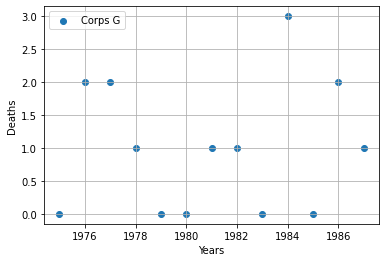

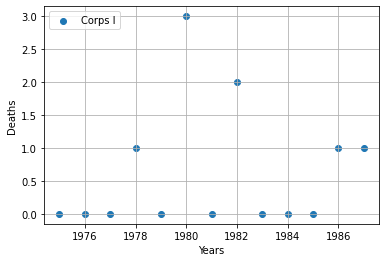

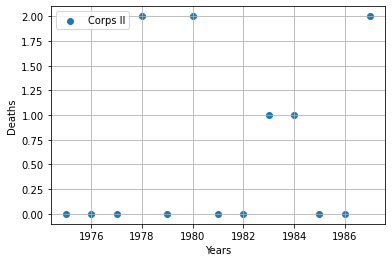

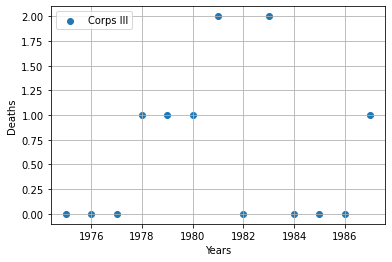

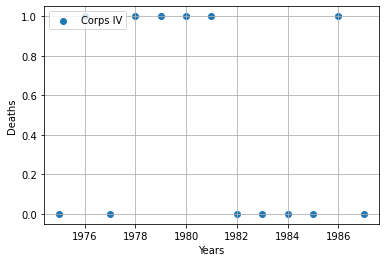

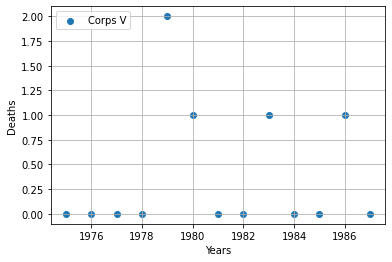

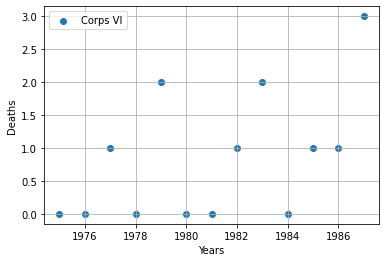

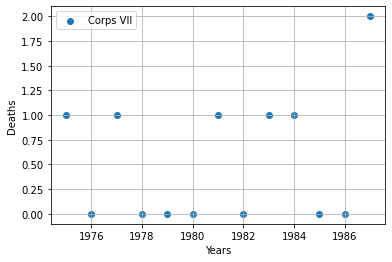

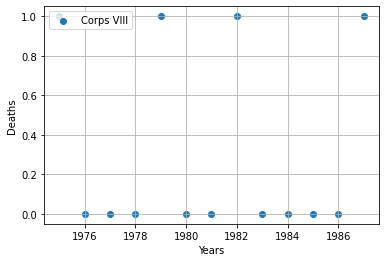

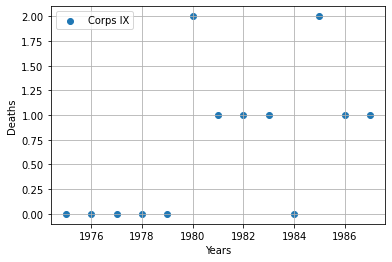

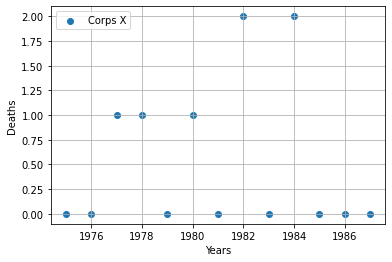

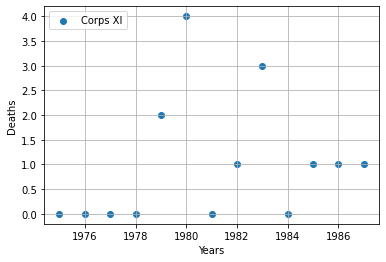

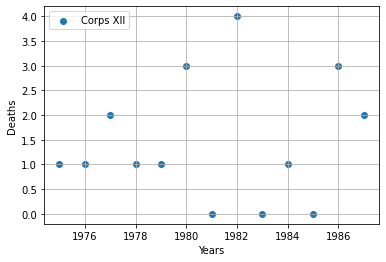

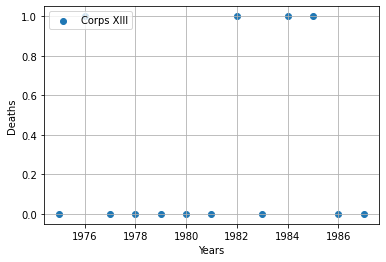

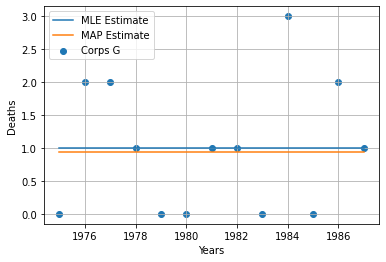

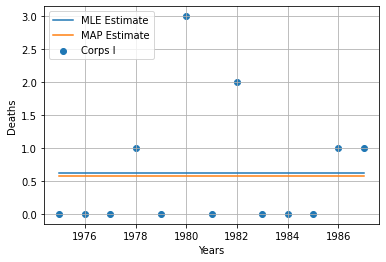

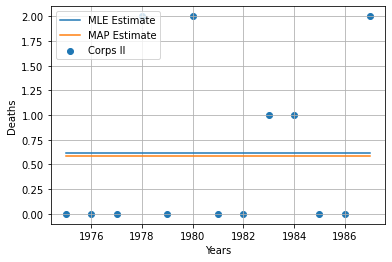

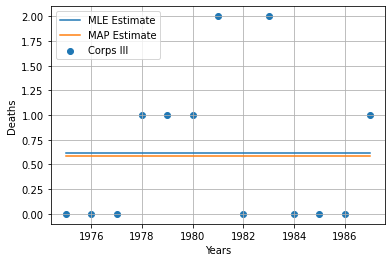

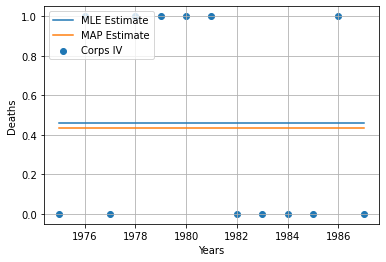

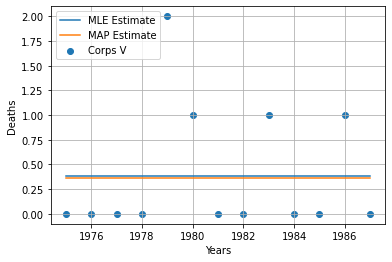

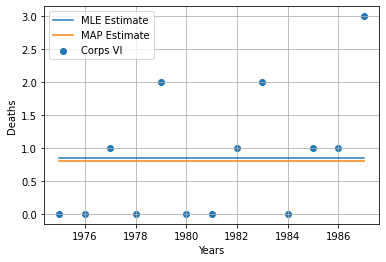

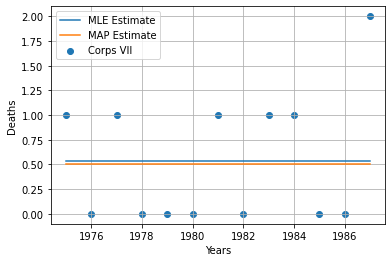

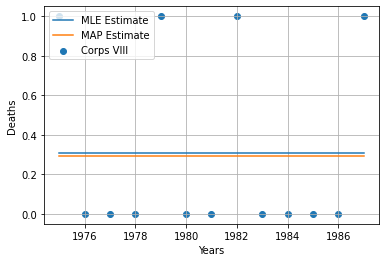

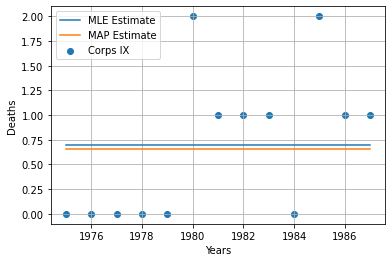

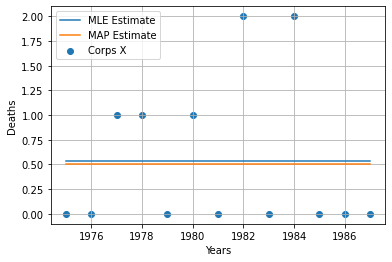

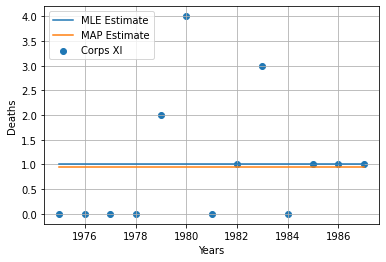

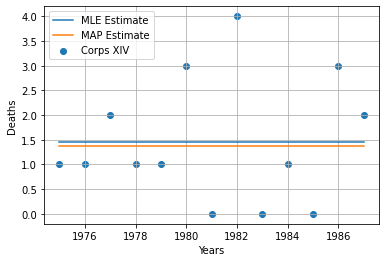

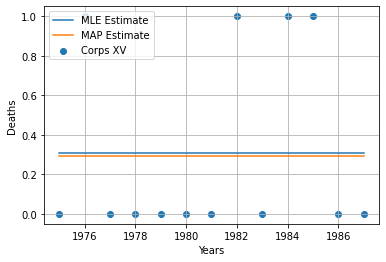

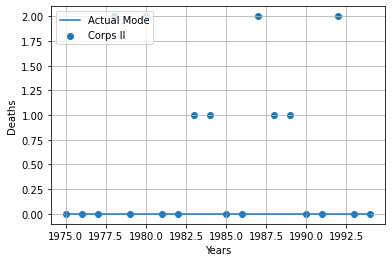

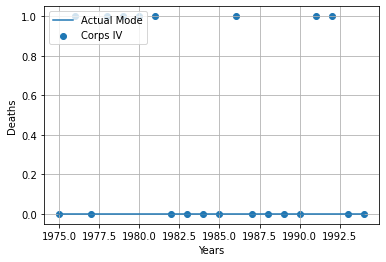

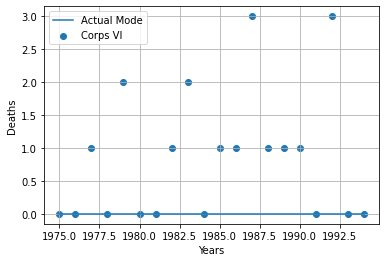

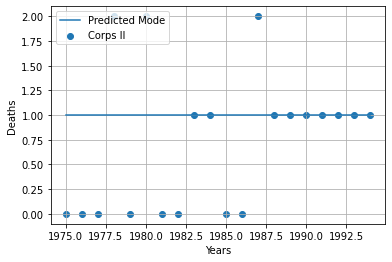

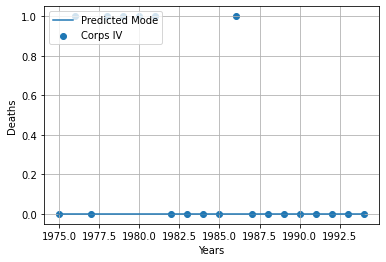

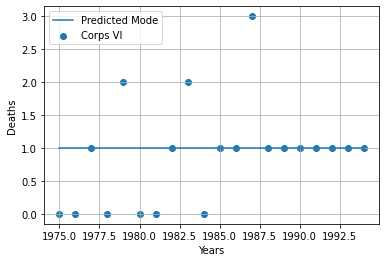

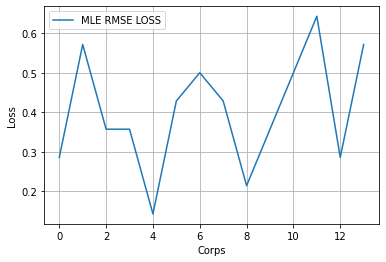

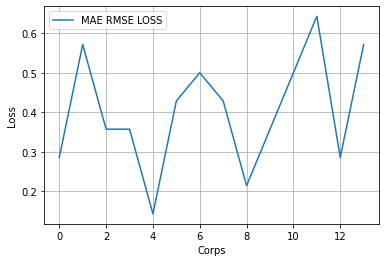

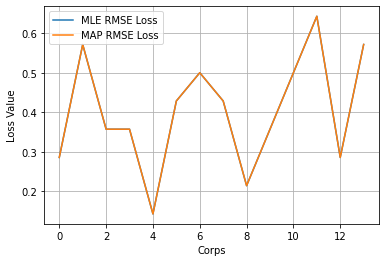

Mode of Likelihood: 0.6156615661566157


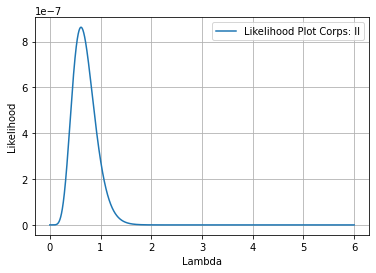

Mode of Prior: 0.0


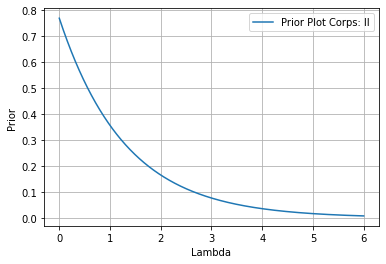

Mode of Posterior: 0.5808580858085809


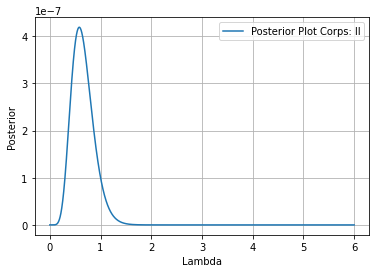

Mode of Likelihood: 0.4614461446144615


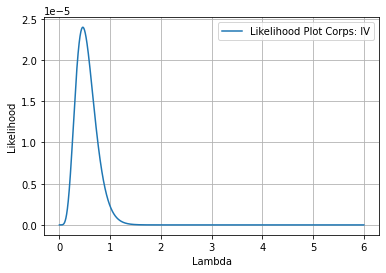

Mode of Prior: 0.0


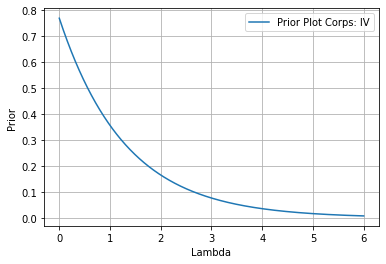

Mode of Posterior: 0.4356435643564357


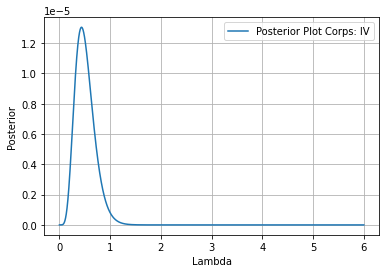

Mode of Likelihood: 0.8460846084608461


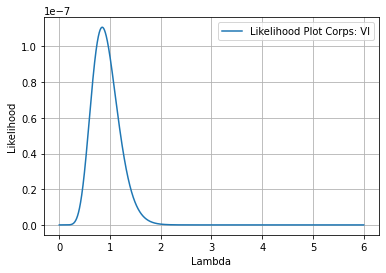

Mode of Prior: 0.0


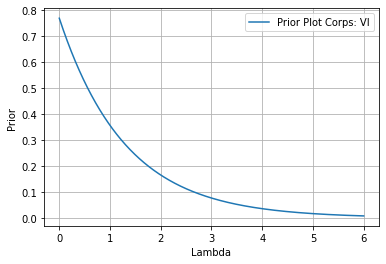

Mode of Posterior: 0.7986798679867988


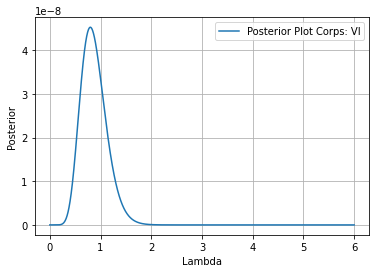

In [17]:
# Visualzations
Prussian_Visualize(X_train)
MLE_MAP_Visualize(X_train,parameter1,parameter2)
Corps_Mode_list = [2,4,6]
plot_Modes(X_train,X_test,Corps_Mode_list,'Actual Mode')
plot_Modes(X_train,preds2,Corps_Mode_list,'Predicted Mode')
plot_data(loss1,'MLE RMSE LOSS','Corps','Loss')
plot_data(loss2,'MAE RMSE LOSS','Corps','Loss')
plot_loss_compare(loss1,loss2)
plot_probs(X_train,'II')
plot_probs(X_train,'IV')
plot_probs(X_train,'VI')

In [12]:
%%shell
jupyter nbconvert --to html /content/Assignment_1_Q3.ipynb

[NbConvertApp] Converting notebook /content/ML_Assignment_1_Q3.ipynb to html
[NbConvertApp] Writing 981556 bytes to /content/ML_Assignment_1_Q3.html
